In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset
import plotly
from plotly.offline import init_notebook_mode
import plotly.express as px
import scipy
from scipy import stats
import seaborn as sns
import sys
import sklearn
from sklearn import decomposition
from sklearn.metrics.cluster import adjusted_rand_score 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv(r"C:\Users\Jordan\Desktop\data_simulation.csv",sep=',', error_bad_lines=False, low_memory=False)

In [4]:
df.head()

,customer_unique_id,Recency,Frequency,Monetary,review_score,purchase_time
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,5.0,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,4.0,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,586,1,86.22,3.0,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,4.0,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89,5.0,2017-11-14 19:45:42


In [5]:
df

,customer_unique_id,Recency,Frequency,Monetary,review_score,purchase_time
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,5.0,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,4.0,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,586,1,86.22,3.0,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,4.0,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89,5.0,2017-11-14 19:45:42
...,...,...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,496,1,4134.84,5.0,2017-06-08 21:00:36
96092,fffea47cd6d3cc0a88bd621562a9d061,311,1,84.58,4.0,2017-12-10 20:07:56
96093,ffff371b4d645b6ecea244b27531430a,618,1,112.46,5.0,2017-02-07 15:49:16
96094,ffff5962728ec6157033ef9805bacc48,169,1,133.69,5.0,2018-05-02 15:17:41


In [4]:
df.drop("customer_unique_id", axis = 1,inplace = True)

In [5]:
print("Date du dernier achat", df.purchase_time.max())
print("Date du premier achat", df.purchase_time.min())

Date du dernier achat 2018-10-17 17:30:18
Date du premier achat 2016-09-04 21:15:19


In [6]:
df.purchase_time = df.purchase_time.apply(pd.to_datetime, format='%Y-%m-%d')

In [7]:
df.purchase_time = df.purchase_time.apply(lambda x: x.date())

### Initialisation avec un an de données.

Période T0 = 12 mois

In [8]:
df0 = df[df.purchase_time <= (df.purchase_time.min() + DateOffset(years=1))]

In [9]:
df0 = df0.drop("purchase_time", axis = 1)

#standardisation
ss = StandardScaler()
df0_scaled = pd.DataFrame(data= ss.fit_transform(df0), columns = df0.columns)



In [13]:
df0_scaled = df0_scaled.fillna(0)

In [14]:
#analyse en composantes principales pour réduction
pca0 = decomposition.PCA(random_state = 42)
pca0.fit(df0_scaled)
projected0 = pca0.transform(df0_scaled)

#on récupère les 3 eres composantes principales
df0_scaled["PC1"] =projected0[:,0]
df0_scaled["PC2"] = projected0[:,1]
df0_scaled["PC3"] = projected0[:,2]
    
df0_pca0 = df0_scaled[['PC1','PC2', 'PC3']]

### Fonction

In [19]:
def calc_period(data, nbdays):
    '''
    Fonction qui crée un dataframe avec 1 an + nbdays de données
        Paramètre : 
            data : dataframe 
            nbdays : entier, nombre de jours à ajouter à 365 jours
        Sortie : Dataframe de données sur l'intervalle de temps voulu
        
    '''
    return data[data.purchase_time <= (data.purchase_time.min() + DateOffset(days=365+nbdays))]

In [24]:
def std_pca_data(df):
    '''
    Fonction qui standardise puis réalise une ACP et réduis à 3 composantes un Dataframe
        Paramètres : 
            df : Dataframe 
        Sortie : 
            Dataframe standardisé et projeté sur ses 3 premières composantes principales 
    '''
    df = df.drop("purchase_time", axis = 1)
    #standardisation
    ss = StandardScaler()
    df_scaled = pd.DataFrame(data= ss.fit_transform(df), columns = df.columns)
    df_scaled = df_scaled.fillna(0)
    #analyse en composantes principales pour réduction
    pca = decomposition.PCA(random_state = 42)
    pca.fit(df_scaled)
    projected = pca.transform(df_scaled)
    #on récupère les 3 eres composantes principales
    df_projected = pd.DataFrame()
    df_projected["PC1"] =projected[:,0]
    df_projected["PC2"] = projected[:,1]
    df_projected["PC3"] = projected[:,2]
    
    #df_pca = df_scaled[['PC1','PC2', 'PC3']]
    
    return   df_projected, df_scaled   

In [25]:
def calcKmeans(df_pca): 
    '''
    Applique la segmentation K-means sur un dataframe
    
        Paramètres : 
            df_pca: dataframe (réduis avec ACP idéalement) à segmenter
        Sortie : 
            Liste des clusters calculés
    '''
    kmeans = KMeans(n_clusters = 5, random_state = 1).fit(df_pca)
    #clusters = kmeans.predict(df_pca)
    cluster_labels = kmeans.labels_
    df_pca_km = df_pca.assign(Cluster = cluster_labels)
    return  cluster_labels

### Comparaison des modèles

In [26]:
ari_score = []
for i in range(0,300,20):
    
    df_projected_i, df_scaled_i = std_pca_data(calc_period(df, i))

    #On applique la PCA initiale sur la nouvelle période
    projected_i0 = pca0.transform(df_scaled_i)
    #on récupère les 3 eres composantes principales
    df_projected_i0 = pd.DataFrame()
    df_projected_i0["PC1"] =projected_i0[:,0]
    df_projected_i0["PC2"] = projected_i0[:,1]
    df_projected_i0["PC3"] = projected_i0[:,2]
    
    #df_pca_k0 = df_scaled_k[['PC1','PC2', 'PC3']]
    ari_i = adjusted_rand_score(calcKmeans(df_projected_i0),calcKmeans(df_projected_i))
    
    ari_score.append([i,ari_i])

In [27]:
ari_score = pd.DataFrame(ari_score, columns=["periode", "ARI"] )
ari_score

,periode,ARI
0,0,1.000000
1,20,0.893499
2,40,0.956089
3,60,0.967142
4,80,0.893869
5,100,0.829669
6,120,0.841942
7,140,0.832888
8,160,0.819541
9,180,0.797197


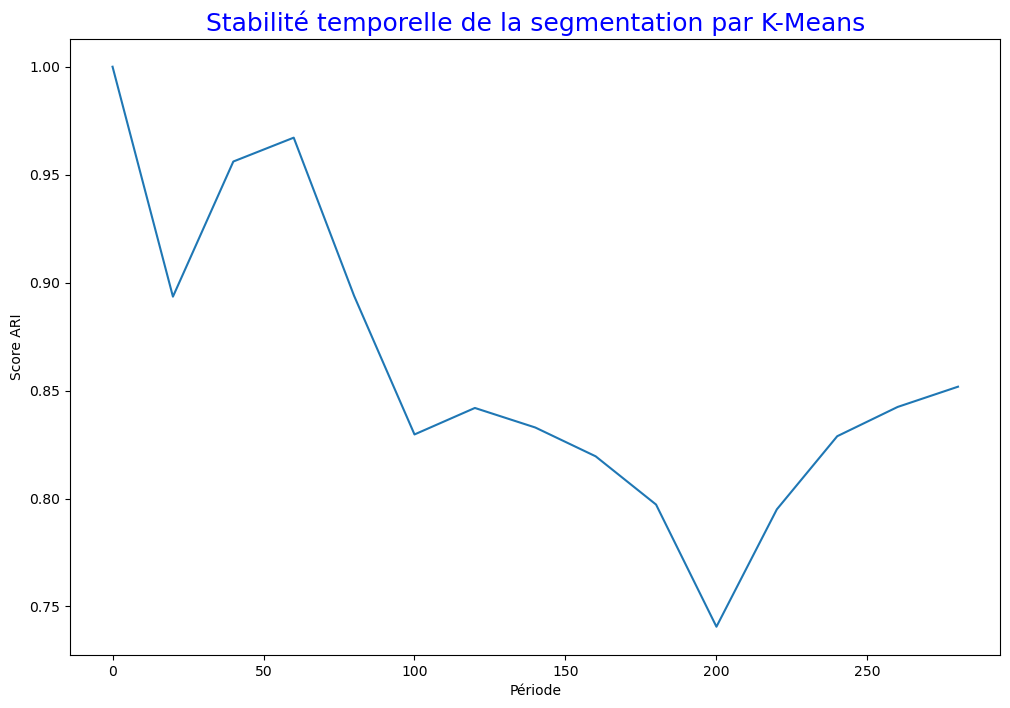

In [29]:
# plot ARI Score
fig = plt.figure(figsize=(12,8))
sns.lineplot(data=ari_score, x="periode", y="ARI")

plt.xlabel("Période")
plt.ylabel("Score ARI")
plt.title("Stabilité temporelle de la segmentation par K-Means",
          fontsize=18,
          color="b")
plt.show()